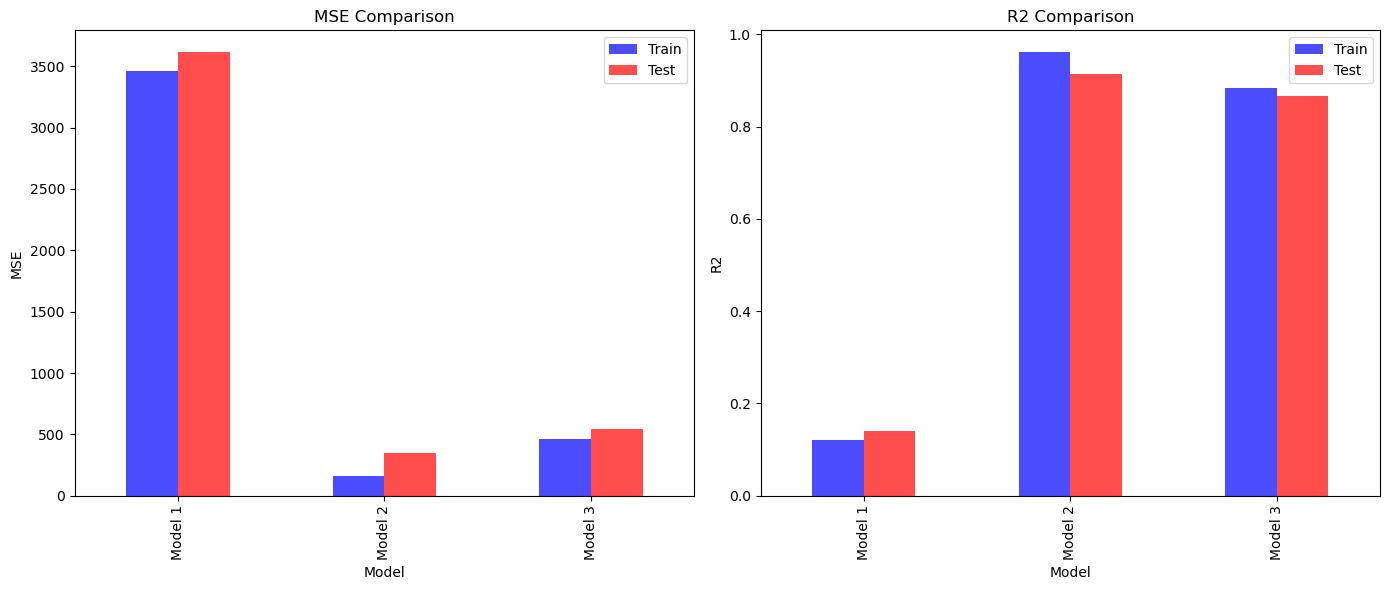

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas DataFrames
df1 = pd.read_csv('01_model_performance.csv')
df2 = pd.read_csv('02_model_performance.csv')
df3 = pd.read_csv('03_model_performance.csv')

# Combine the dataframes into one for easier plotting
df_combined = pd.concat([df1, df2, df3], keys=['Model 1', 'Model 2', 'Model 3']).reset_index(level=0)
df_combined.rename(columns={'level_0': 'Model'}, inplace=True)

# Pivot to get the data in a format suitable for plotting
df_mse = df_combined[df_combined['Metric'] == 'MSE'].pivot(index='Model', columns='Metric', values=['Train', 'Test'])
df_r2 = df_combined[df_combined['Metric'] == 'R2'].pivot(index='Model', columns='Metric', values=['Train', 'Test'])

# Plot MSE and R2 in separate subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE Comparison
df_mse.plot(kind='bar', ax=axes[0], color=['blue', 'red'], alpha=0.7)
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('MSE')
axes[0].legend(['Train', 'Test'])

# R2 Comparison
df_r2.plot(kind='bar', ax=axes[1], color=['blue', 'red'], alpha=0.7)
axes[1].set_title('R2 Comparison')
axes[1].set_ylabel('R2')
axes[1].legend(['Train', 'Test'])

# Show the plots
plt.tight_layout()
plt.show()